<h1 align="center"> CSE 142 Assignment 4, Winter 2024

<h2 align="center"> 4 Questions, 100 pts, due: 23:59 pm, March 4rth, 2024
    
    Your name:          Student ID:

## Instruction 

- Submit your assignments onto **Gradescope** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file, please **rename this file with your name included**.

    (2) Also save your file into a pdf version, if error appears, save an html version instead (easy to grade for written questions).
    
    **For assignment related questions, please reach TA or grader through Slack/Piazza/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 

## Objective 

- **Task 1:** EM algorithm (Mathematical Derivation) - **Optional Exercise**
- **Task 2:** K-Means implementation (Coding)
- **Task 3:** Kernel Methods with Noisy Setting (Coding)


# Question 1. (Bonus OPTIONAL) EM algorithm, 20 pts 

Derive the E-step and M-step update equations of EM algorithm for estimating the Gaussian mixture model $p(X;\theta) = ∑_{k=1}^{K} \pi_k N(x; \mu_k, \sigma_k^2)$ where $\pi_k$ is the mixture weight with $\pi_k \ge 0$  and  $∑_{k=1}^{K} \pi_k = 1$, and $\mu_k$, $\sigma^2_k$ are the mean and variance of the gaussian distribution corresponding to cluster k. 

For the E-step, first prove that $z_{ik} = \color{yellow}{P(z_i = k | X, \mu ,\sigma, \pi)} = \dfrac {\pi_k N(x_i; \mu_k, \sigma_k^2)}{∑_{k=1}^{K} \pi_k N(x_i; \mu_k, \sigma_k^2)}$. Then, for the M-step, show the derivation to compute the updates for $(\mu_k, \pi_k)$. Note that, you don't need to show the derivation for $\sigma_k$. For each derivation step, mention the concept applied (e.g. just 2-3 keywords, e.g. formula for expectation, independence of datapoints, (f+g)' = f' + g', etc ... ). 

**Hint:** For the M-step, you need to solve for $\mu_k^t = \underset{\mu_k}{argmax} \ \color{yellow}E_{p(Z | X, \mu^{(t-1)}, \sigma^{(t-1)}, \pi^{(t-1)})}{[\log p(X, Z | \mu, \sigma, \pi)]}$ (and similarly for $\pi_k$) by applying the first order conditions for function optimization (take derivative and set it to zero). Note that the term $\color{yellow}{p(Z|X,\mu^{(t-1)},\sigma^{(t-1)},\pi^{(t-1)})}$ is the one computed in the E-step, and uses fixed values for $\mu, \sigma, \pi$ from the previous iteration (t-1).

**This exercise is optional, any effort will be rewarded with extra points on the assignment as a whole!**






In [ ]:
from IPython.display import Image
# Replace the figure name
# Image(filename='sample.png') 

# Question 2. (K-Means implementation, 25 pts)

#### **Question 2.1.** Implement K-means in Python from scratch. Complete following sub-functions `update_centroids` and `update_assignments`.


In [49]:
import numpy as np
def update_assignments(data, centroids):

  ########################
  #### YOUR CODE HERE ####
  ## you will get cluster# 
  ##assignments here #####
  ########################

  assignments = []

  for point in data:
    distances = np.sqrt(np.sum((point - centroids) ** 2, axis=1))
    cluster_num = np.argmin(distances)
    assignments.append(cluster_num)

  assignments = np.array(assignments)
  return assignments


def update_centroids(data,centroids,assignments):

  ########################
  #### YOUR CODE HERE ####
  ########################
  
  for i in range(len(centroids)):
     centroids[i] = np.mean(data[i == assignments], axis=0)

  centroids = np.array(centroids)

  return centroids


def kmeans(data, centroids, max_iterations):    

    for j in range(max_iterations):
        # update cluter assignments
        assignments = update_assignments(data,centroids)    # WRITE CODE FOR update_assignments
        
        # update centroid locations
        centroids = update_centroids(data,centroids,assignments)  # WRITE CODE FOR update_centroids
        
    # final assignment update
    assignments = update_assignments(data,centroids)
    return centroids, assignments

#### **Question 2.2.** Run your code on following toy dataset for different k-values, where k = {2, 3, 4, 6, 10} and plot the cluster assignments for different k's as shown in following diagram.

[False False False ... False False False]
[False False False ...  True False  True]
[ True False  True ... False  True False]
[False  True False ... False False False]


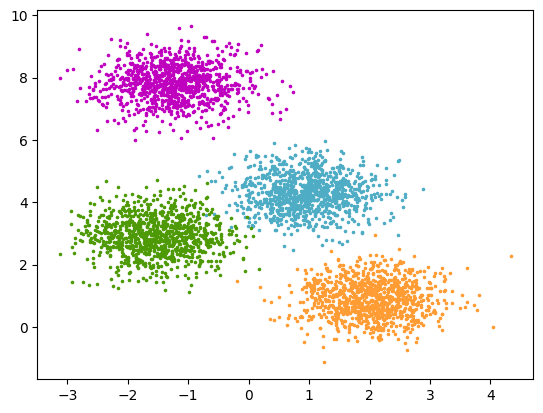

In [50]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)

colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    print(cluster_data)
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)


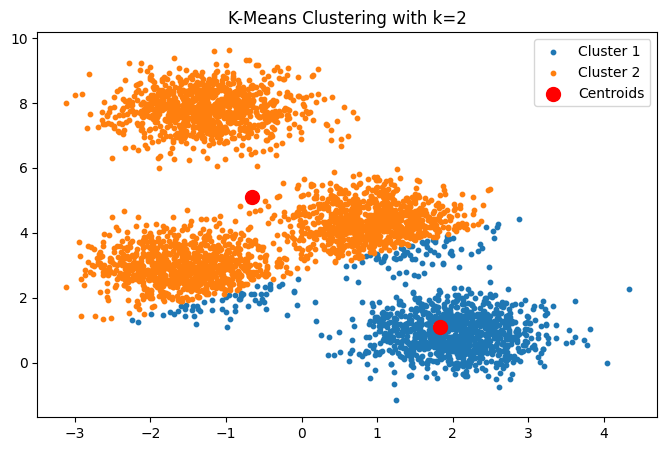

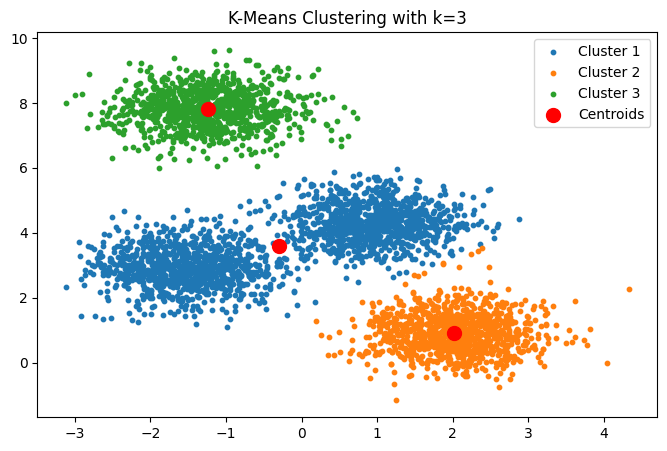

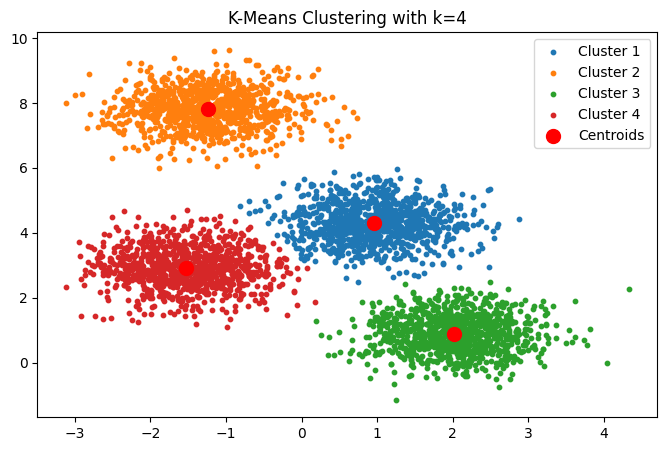

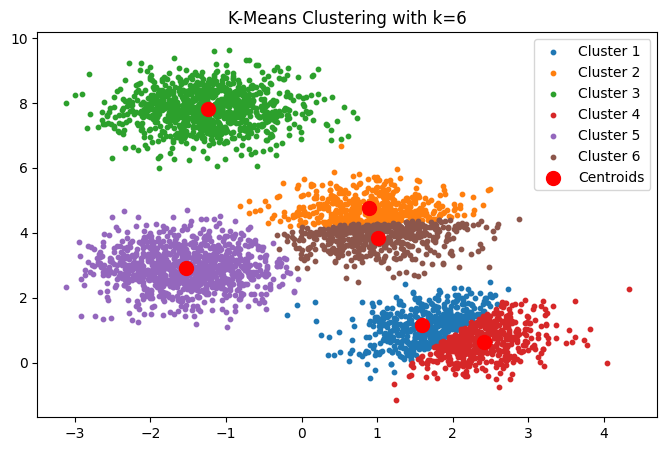

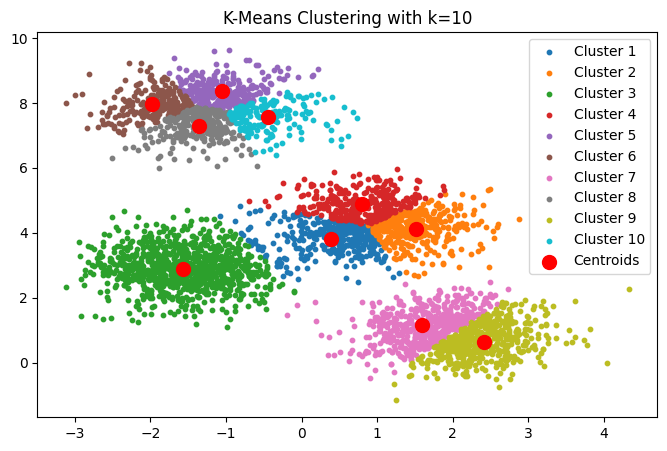

In [54]:

import numpy as np

# function to get initial cluster centroids; we randomly choose k points from the dataset 
def get_initial_clusters(k, X):
  random_indices = np.random.randint(0, X.shape[0], k)
  initial_centroids = X[random_indices]

  return initial_centroids

# your code here.
k_values = [2, 3, 4, 6, 10]

for k in k_values:
    initial_centroids = get_initial_clusters(k, X)
    centroids, assignments = kmeans(X, initial_centroids, max_iterations=100)
    plt.figure(figsize=(8, 5))
    for i in range(k):
        cluster_data = X[assignments == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=10, label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids')
    plt.title(f'K-Means Clustering with k={k}')
    plt.legend()
    plt.show()


# initial_centroids = [[2.95934796,0.66181782],[-1.35788611,3.46724432]]
# print(initial_centroids)
# new = update_assignments(X, initial_centroids)

# # print(update_assignments(X, initial_centroids)[:5])
# print(update_centroids(X, initial_centroids, new))


# Question 3. (Kernel Methods with Noisy Setting, 75 pts)

**SVM on synthetic dataset generated as follows:**

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_+ = (1,1)$ and $\Sigma_+ = [1, 0; 0, 1]$ and label them as $+1$.

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_- = (-1,-1)$ and $\Sigma_- = [3, 0; 0, 3]$ and label them as $-1$.
    
- This gives you a $2000$ example training set. Repeat the above to draw a test set the same way.

Use a SVM package ( scikit-learn svm.SVC class) to learn SVMs with a variety of parameter settings. 

## (a -- 25 pts) 

- Use an RBF kernel with parameters $C=1$, $\gamma = 0.01$. 

- For each training data with +1 label, randomly flip their label to -1 with probability $\textbf{0.35}$.

- For each training data with -1 label, randomly flip their label to +1 with probability $\textbf{0.20}$.

- Train with the above noisy training examples.

- Random flipping introduces the randomness. You can repeat multiple times (e.g. 20) and then report the average accuracy on the testing dataset (clean) in the noise parameter setting. 



In [ ]:
# Your code here



## (b -- 25 pts) Open question

- Try using **K-Nearst Neighbors** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?


In [ ]:
# Your code here



## (c -- 25 pts) Open question

- Try using **clustering (i.e., K-means, EM-clustering)** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?

In [ ]:
# Your code here

